# Real-World Data Wrangling

In this project, we apply data wrangling skills to gather and wrangle real-world data with two datasets.
We retrieve and extract the data, assess the data programmatically and visually across elements of data quality and structure,
implement a cleaning strategy, store the updated data, combine the datasets, and answer a research question with visualizations.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import os
import io

# Configure plot styling
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 100
%matplotlib inline

## 1. Gather Data

In this section, we extract data using two different data gathering methods and combine the data.

### 1.1. Problem Statement

This project explores the relationship between economic factors and national happiness across countries worldwide. Specifically, we investigate how GDP per capita, population size, and life expectancy relate to happiness scores, and whether social factors such as social support, freedom, and perceptions of corruption play a role beyond wealth alone. We wrangle two datasets: the World Happiness Report (2015–2019) and World Bank economic indicators, merging them to enable a comprehensive cross-country analysis.

### 1.2. Gather at least two datasets using two different data gathering methods

#### Dataset 1: World Happiness Report (2015–2019)

Type: CSV files

Method: The data was gathered using the **programmatic file download** method. We use the `requests` library to download CSV files for each year (2015–2019) from a public GitHub repository hosting the World Happiness Report data. Each file is downloaded individually and loaded into a pandas DataFrame. We chose this dataset because it provides standardized happiness metrics across 150+ countries over multiple years, which enables us to analyze trends and cross-sectional patterns. By combining five years of data (155–158 countries per year), we obtain a dataset of 782 total observations, well exceeding the 500-sample threshold.

Dataset variables:
* **Country**: The name of the country
* **Happiness Score**: A composite score (0–10) based on survey responses about life satisfaction
* **GDP per Capita**: Economic output per person (log-scaled in the report)
* **Social Support**: The national average of the binary response to having someone to count on
* **Healthy Life Expectancy**: Average number of healthy life years expected at birth
* **Freedom**: The national average of satisfaction with freedom to make life choices
* **Generosity**: The residual of regressing the national average of charitable donations on GDP per capita
* **Perceptions of Corruption**: The national average of perceptions of corruption in government and business

In [2]:
# Dataset 1: Programmatic download of World Happiness Report data (2015-2019)
# We download each year's CSV from a public GitHub repository

base_url = 'https://raw.githubusercontent.com/MainakRepositor/Datasets/master/World%20Happiness%20Data/'
years = [2015, 2016, 2017, 2018, 2019]
happiness_dfs = {}

for year in years:
    url = f'{base_url}{year}.csv'
    response = requests.get(url)
    print(f'Year {year}: HTTP {response.status_code}, Size: {len(response.content)} bytes')
    
    # Load directly from the response content into a DataFrame
    df = pd.read_csv(io.StringIO(response.text))
    df['Year'] = year  # Add year column for tracking
    happiness_dfs[year] = df
    print(f'  Columns: {list(df.columns)}')
    print(f'  Shape: {df.shape}')
    print()

Year 2015: HTTP 200, Size: 16557 bytes
  Columns: ['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual', 'Year']
  Shape: (158, 13)



Year 2016: HTTP 200, Size: 17132 bytes
  Columns: ['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual', 'Year']
  Shape: (157, 14)



Year 2017: HTTP 200, Size: 29380 bytes
  Columns: ['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high', 'Whisker.low', 'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom', 'Generosity', 'Trust..Government.Corruption.', 'Dystopia.Residual', 'Year']
  Shape: (155, 13)



Year 2018: HTTP 200, Size: 8652 bytes
  Columns: ['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Year']
  Shape: (156, 10)



Year 2019: HTTP 200, Size: 8665 bytes
  Columns: ['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Year']
  Shape: (156, 10)



In [3]:
# Combine all years into a single DataFrame
happiness_raw = pd.concat(happiness_dfs.values(), ignore_index=True)
print(f'Combined happiness dataset shape: {happiness_raw.shape}')
happiness_raw.head()

Combined happiness dataset shape: (782, 31)


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,Trust..Government.Corruption.,Dystopia.Residual,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption
0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Canada,North America,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Dataset 2: World Bank Economic Indicators

Type: JSON (via REST API)

Method: The data was gathered using the **API** method. We access the World Bank's open REST API, which provides free, unauthenticated access to hundreds of development indicators. We query three indicators (GDP per capita in current US$, total population, and life expectancy at birth) for all countries from 2015 to 2019. We chose this dataset because it offers standardized, internationally comparable economic measurements that complement the subjective well-being data from the Happiness Report.

Dataset variables:
* **Country Name**: The official country name as used by the World Bank
* **Country Code**: The ISO 3-letter country code
* **Year**: The year of the observation
* **GDP per Capita (Current US$)**: Gross domestic product divided by midyear population, in current US dollars
* **Population**: Total population count based on the de facto definition
* **Life Expectancy**: Life expectancy at birth (years), indicating overall mortality level

In [4]:
# Dataset 2: World Bank REST API - download economic indicators
# The World Bank API is free and requires no authentication

indicators = {
    'NY.GDP.PCAP.CD': 'GDP_per_Capita_USD',
    'SP.POP.TOTL': 'Population',
    'SP.DYN.LE00.IN': 'Life_Expectancy_WB'
}

wb_frames = []

for indicator_code, col_name in indicators.items():
    url = (f'https://api.worldbank.org/v2/country/all/indicator/{indicator_code}'
           f'?date=2015:2019&format=json&per_page=2000')
    response = requests.get(url)
    print(f'{col_name}: HTTP {response.status_code}')
    
    # Parse the JSON response
    data = response.json()
    records = data[1]  # data[0] is metadata, data[1] is the actual records
    
    # Extract relevant fields from nested JSON
    rows = []
    for record in records:
        rows.append({
            'Country_Name': record['country']['value'],
            'Country_Code': record['countryiso3code'],
            'Year': int(record['date']),
            col_name: record['value']
        })
    
    df = pd.DataFrame(rows)
    wb_frames.append(df)
    print(f'  Records: {len(rows)}')

# Merge all indicators into one World Bank DataFrame
wb_raw = wb_frames[0]
for df in wb_frames[1:]:
    wb_raw = wb_raw.merge(df, on=['Country_Name', 'Country_Code', 'Year'], how='outer')

print(f'\nCombined World Bank dataset shape: {wb_raw.shape}')
wb_raw.head()

GDP_per_Capita_USD: HTTP 200
  Records: 1330


Population: HTTP 200
  Records: 1330


Life_Expectancy_WB: HTTP 200
  Records: 1330

Combined World Bank dataset shape: (1330, 6)


,Country_Name,Country_Code,Year,GDP_per_Capita_USD,Population,Life_Expectancy_WB
0,Afghanistan,AFG,2015,565.569730,33831764.0,62.270
1,Afghanistan,AFG,2016,522.082216,34700612.0,62.646
2,Afghanistan,AFG,2017,525.469771,35688935.0,62.406
3,Afghanistan,AFG,2018,491.337221,36743039.0,62.443
4,Afghanistan,AFG,2019,496.602504,37856121.0,62.941


#### Save Raw Data

We save the raw datasets locally before any cleaning, preserving the original data for reproducibility.

In [5]:
# Save raw datasets to local data store
happiness_raw.to_csv('raw_happiness.csv', index=False)
wb_raw.to_csv('raw_worldbank.csv', index=False)
print('Raw data saved:')
print(f'  raw_happiness.csv  ({happiness_raw.shape[0]} rows, {happiness_raw.shape[1]} columns)')
print(f'  raw_worldbank.csv  ({wb_raw.shape[0]} rows, {wb_raw.shape[1]} columns)')

Raw data saved:
  raw_happiness.csv  (782 rows, 31 columns)
  raw_worldbank.csv  (1330 rows, 6 columns)


## 2. Assess Data

We assess the data according to data quality and tidiness metrics. Below we identify **two data quality issues** and **two data tidiness issues**, assessing each both visually and programmatically.

### Quality Issue 1: Missing Values in Happiness Report Data

In [6]:
# Visual assessment: display rows with missing values
# Justification: .head() and visual scanning help us spot NaN entries directly
print('--- Sample of rows with missing values ---')
mask = happiness_raw.isnull().any(axis=1)
happiness_raw[mask].head(10)

--- Sample of rows with missing values ---


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,Trust..Government.Corruption.,Dystopia.Residual,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption
0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Canada,North America,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Finland,Western Europe,6.0,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Netherlands,Western Europe,7.0,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Sweden,Western Europe,8.0,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,New Zealand,Australia and New Zealand,9.0,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Australia,Australia and New Zealand,10.0,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Programmatic assessment: count missing values per column
# Justification: .isnull().sum() gives an exact count of missing entries per column,
# while .info() confirms data types and non-null counts
print('Missing values per column in happiness_raw:')
print(happiness_raw.isnull().sum())
print(f'\nTotal rows: {len(happiness_raw)}')
print(f'Rows with any missing value: {happiness_raw.isnull().any(axis=1).sum()}')
print()
happiness_raw.info()

Missing values per column in happiness_raw:
Country                          312
Region                           467
Happiness Rank                   467
Happiness Score                  467
Standard Error                   624
Economy (GDP per Capita)         467
Family                           312
Health (Life Expectancy)         467
Freedom                          312
Trust (Government Corruption)    467
Generosity                         0
Dystopia Residual                467
Year                               0
Lower Confidence Interval        625
Upper Confidence Interval        625
Happiness.Rank                   627
Happiness.Score                  627
Whisker.high                     627
Whisker.low                      627
Economy..GDP.per.Capita.         627
Health..Life.Expectancy.         627
Trust..Government.Corruption.    627
Dystopia.Residual                627
Overall rank                     470
Country or region                470
Score                          

**Issue and Justification:** The combined happiness dataset has missing values in several columns. The `Region` column is entirely missing for years 2017–2019 (since those CSV files did not include it). Additionally, some columns like `Perceptions of corruption` and `Trust (Government Corruption)` have scattered missing values. Missing values can distort analysis results—for example, calculating average corruption scores would be biased if countries with high or low corruption systematically lack data. We detected this using `isnull().sum()` to count missing entries and visual inspection to confirm the pattern.

### Quality Issue 2: Inconsistent Country Names Across Datasets

In [8]:
# Visual assessment: compare country names between datasets
# Justification: displaying sorted unique names side-by-side reveals naming discrepancies
happiness_countries = set(happiness_raw.iloc[:, 0].dropna().unique())  # first column is country
wb_countries = set(wb_raw['Country_Name'].dropna().unique())

# Countries in happiness data but not in World Bank
only_happiness = sorted(happiness_countries - wb_countries)
print(f'Countries in Happiness data but NOT in World Bank ({len(only_happiness)}):')
for c in only_happiness[:15]:
    print(f'  - {c}')

Countries in Happiness data but NOT in World Bank (28):
  - Congo (Brazzaville)
  - Congo (Kinshasa)
  - Czech Republic
  - Egypt
  - Hong Kong
  - Hong Kong S.A.R., China
  - Iran
  - Ivory Coast
  - Kyrgyzstan
  - Laos
  - Macedonia
  - North Cyprus
  - Palestinian Territories
  - Puerto Rico
  - Russia


In [9]:
# Programmatic assessment: find potential matches using string similarity
# Justification: computing the overlap quantifies the inconsistency precisely
overlap = happiness_countries & wb_countries
print(f'Exact matches: {len(overlap)} countries')
print(f'Happiness-only: {len(only_happiness)} countries')
only_wb = sorted(wb_countries - happiness_countries)
print(f'World Bank-only: {len(only_wb)} countries')
print()
# Show some likely mismatches
print('Sample World Bank names that may correspond to Happiness-only names:')
for h in only_happiness[:10]:
    for w in only_wb:
        if h[:4].lower() == w[:4].lower():
            print(f'  Happiness: "{h}" <-> World Bank: "{w}"')

Exact matches: 138 countries
Happiness-only: 28 countries
World Bank-only: 128 countries

Sample World Bank names that may correspond to Happiness-only names:
  Happiness: "Congo (Brazzaville)" <-> World Bank: "Congo, Dem. Rep."
  Happiness: "Congo (Brazzaville)" <-> World Bank: "Congo, Rep."
  Happiness: "Congo (Kinshasa)" <-> World Bank: "Congo, Dem. Rep."
  Happiness: "Congo (Kinshasa)" <-> World Bank: "Congo, Rep."
  Happiness: "Czech Republic" <-> World Bank: "Czechia"
  Happiness: "Egypt" <-> World Bank: "Egypt, Arab Rep."
  Happiness: "Hong Kong" <-> World Bank: "Hong Kong SAR, China"
  Happiness: "Hong Kong S.A.R., China" <-> World Bank: "Hong Kong SAR, China"
  Happiness: "Iran" <-> World Bank: "Iran, Islamic Rep."
  Happiness: "Kyrgyzstan" <-> World Bank: "Kyrgyz Republic"


**Issue and Justification:** Country names are inconsistent between the two datasets. For example, the Happiness Report uses "United States" while the World Bank uses "United States"; but other names differ, such as "Taiwan Province of China" vs "Taiwan, China" or "South Korea" vs "Korea, Rep.". This inconsistency would cause data loss when merging. We identified it by computing the set difference between country name lists and looking for near-matches.

### Tidiness Issue 1: Single Observational Unit Split Across Two Tables

In [10]:
# Visual assessment: show that both datasets describe the same entity (country-year)
# Justification: displaying side by side shows the same countries appear in both tables
print('Happiness data sample (first 3 rows):')
print(happiness_raw.head(3).to_string())
print()
print('World Bank data sample (first 3 rows):')
print(wb_raw.head(3).to_string())

Happiness data sample (first 3 rows):
       Country          Region  Happiness Rank  Happiness Score  Standard Error  Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  Trust (Government Corruption)  Generosity  Dystopia Residual  Year  Lower Confidence Interval  Upper Confidence Interval  Happiness.Rank  Happiness.Score  Whisker.high  Whisker.low  Economy..GDP.per.Capita.  Health..Life.Expectancy.  Trust..Government.Corruption.  Dystopia.Residual  Overall rank Country or region  Score  GDP per capita  Social support  Healthy life expectancy  Freedom to make life choices  Perceptions of corruption
0  Switzerland  Western Europe             1.0            7.587         0.03411                   1.39651  1.34951                   0.94143  0.66557                        0.41978     0.29678            2.51738  2015                        NaN                        NaN             NaN              NaN           NaN          NaN                       NaN                  

In [11]:
# Programmatic assessment: confirm both datasets share the same observational unit
# Justification: checking for common keys (country + year) confirms they can be joined
print(f'Happiness data: {happiness_raw.shape[0]} rows covering {happiness_raw["Year"].nunique()} years')
print(f'World Bank data: {wb_raw.shape[0]} rows covering {wb_raw["Year"].nunique()} years')
print(f'\nBoth datasets describe country-year observations but are stored in separate tables.')
print('This violates the tidy data rule: each type of observational unit should form a single table.')

Happiness data: 782 rows covering 5 years
World Bank data: 1330 rows covering 5 years

Both datasets describe country-year observations but are stored in separate tables.
This violates the tidy data rule: each type of observational unit should form a single table.


**Issue and Justification:** The happiness data and the economic indicator data both describe the same observational unit—a country in a given year—but they are stored in two separate tables. According to tidy data principles, each type of observational unit should form a single table. Since both datasets measure attributes of the same entity (countries per year), they should be combined into one table. We identified this by noting that both share Country and Year keys.

### Tidiness Issue 2: Inconsistent Column Names Across Years in Happiness Data

In [12]:
# Visual assessment: display column names for each year to show inconsistency
# Justification: listing columns per year reveals structural differences
for year in [2015, 2016, 2017, 2018, 2019]:
    cols = [c for c in happiness_dfs[year].columns if c != 'Year']
    print(f'{year} columns ({len(cols)}): {cols}')
    print()

2015 columns (12): ['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']

2016 columns (13): ['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']

2017 columns (12): ['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high', 'Whisker.low', 'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom', 'Generosity', 'Trust..Government.Corruption.', 'Dystopia.Residual']

2018 columns (9): ['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

2019 columns (9): ['Overall

In [13]:
# Programmatic assessment: count unique column names across all years
# Justification: comparing sets of column names quantifies the inconsistency
all_cols = set()
for year, df in happiness_dfs.items():
    all_cols.update(df.columns)
all_cols.discard('Year')
print(f'Total unique column names across all years: {len(all_cols)}')
print()
# Find columns that represent the same concept but have different names
print('Examples of inconsistent naming for the same variable:')
print('  Happiness score: "Happiness Score" (2015-2016), "Happiness.Score" (2017), "Score" (2018-2019)')
print('  GDP: "Economy (GDP per Capita)" (2015-2016), "Economy..GDP.per.Capita." (2017), "GDP per capita" (2018-2019)')
print('  Country: "Country" (2015-2017), "Country or region" (2018-2019)')

Total unique column names across all years: 30

Examples of inconsistent naming for the same variable:
  Happiness score: "Happiness Score" (2015-2016), "Happiness.Score" (2017), "Score" (2018-2019)
  GDP: "Economy (GDP per Capita)" (2015-2016), "Economy..GDP.per.Capita." (2017), "GDP per capita" (2018-2019)
  Country: "Country" (2015-2017), "Country or region" (2018-2019)


**Issue and Justification:** The World Happiness Report uses different column names across years for the same underlying variable. For example, the happiness score column is called "Happiness Score" in 2015–2016, "Happiness.Score" in 2017, and "Score" in 2018–2019. Similarly, the country column changes from "Country" to "Country or region". This violates the tidy data principle that each variable should form a single, consistently named column. When concatenated without standardization, the resulting DataFrame has many columns that are mostly NaN, because the same data ends up in differently-named columns.

## 3. Clean Data

We now clean the four issues identified above. We first make copies to preserve the raw data, then address each issue with clear justifications and validation.

In [14]:
# Make copies to preserve raw data
happiness_clean = happiness_raw.copy()
wb_clean = wb_raw.copy()
print('Working copies created. Original DataFrames preserved.')

Working copies created. Original DataFrames preserved.


### Tidiness Issue 2: Standardize Column Names Across Years

We clean this issue first because standardizing columns enables proper handling of the other issues.

In [15]:
# Standardize column names by re-processing each year with consistent naming
# Justification: mapping each year's columns to a common schema ensures 
# that each variable forms exactly one column

standardized_frames = []

for year, df in happiness_dfs.items():
    new_df = pd.DataFrame()
    new_df['Year'] = [year] * len(df)
    
    # Map country column (varies by year)
    if 'Country' in df.columns:
        new_df['Country'] = df['Country'].values
    elif 'Country or region' in df.columns:
        new_df['Country'] = df['Country or region'].values
    
    # Map region (only available in 2015-2016)
    if 'Region' in df.columns:
        new_df['Region'] = df['Region'].values
    else:
        new_df['Region'] = np.nan
    
    # Map happiness score
    for col in ['Happiness Score', 'Happiness.Score', 'Score']:
        if col in df.columns:
            new_df['Happiness_Score'] = df[col].values
            break
    
    # Map GDP per capita
    for col in ['Economy (GDP per Capita)', 'Economy..GDP.per.Capita.', 'GDP per capita']:
        if col in df.columns:
            new_df['GDP_per_Capita'] = df[col].values
            break
    
    # Map social support / family
    for col in ['Family', 'Social support']:
        if col in df.columns:
            new_df['Social_Support'] = df[col].values
            break
    
    # Map health / life expectancy
    for col in ['Health (Life Expectancy)', 'Health..Life.Expectancy.', 'Healthy life expectancy']:
        if col in df.columns:
            new_df['Healthy_Life_Expectancy'] = df[col].values
            break
    
    # Map freedom
    for col in ['Freedom', 'Freedom to make life choices']:
        if col in df.columns:
            new_df['Freedom'] = df[col].values
            break
    
    # Map generosity
    if 'Generosity' in df.columns:
        new_df['Generosity'] = df['Generosity'].values
    
    # Map corruption
    for col in ['Trust (Government Corruption)', 'Trust..Government.Corruption.', 'Perceptions of corruption']:
        if col in df.columns:
            new_df['Corruption_Perception'] = df[col].values
            break
    
    standardized_frames.append(new_df)

happiness_clean = pd.concat(standardized_frames, ignore_index=True)
print(f'Standardized happiness data shape: {happiness_clean.shape}')
print(f'Columns: {list(happiness_clean.columns)}')
happiness_clean.head()

Standardized happiness data shape: (782, 10)
Columns: ['Year', 'Country', 'Region', 'Happiness_Score', 'GDP_per_Capita', 'Social_Support', 'Healthy_Life_Expectancy', 'Freedom', 'Generosity', 'Corruption_Perception']


,Year,Country,Region,Happiness_Score,GDP_per_Capita,Social_Support,Healthy_Life_Expectancy,Freedom,Generosity,Corruption_Perception
0,2015,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978
1,2015,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145
2,2015,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357
3,2015,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503
4,2015,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957


In [16]:
# Validate: confirm all columns are consistent and no duplicate-concept columns remain
print('Column names after standardization:')
print(list(happiness_clean.columns))
print(f'\nNull counts:')
print(happiness_clean.isnull().sum())
print(f'\nAll years represented: {sorted(happiness_clean["Year"].unique())}')

Column names after standardization:
['Year', 'Country', 'Region', 'Happiness_Score', 'GDP_per_Capita', 'Social_Support', 'Healthy_Life_Expectancy', 'Freedom', 'Generosity', 'Corruption_Perception']

Null counts:
Year                         0
Country                      0
Region                     467
Happiness_Score              0
GDP_per_Capita               0
Social_Support               0
Healthy_Life_Expectancy      0
Freedom                      0
Generosity                   0
Corruption_Perception        1
dtype: int64

All years represented: [np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018), np.int64(2019)]


**Justification:** We mapped each year's differently-named columns to a single standardized schema. For example, "Happiness Score", "Happiness.Score", and "Score" all map to `Happiness_Score`. This ensures each variable forms exactly one column regardless of the source year. Validation confirms 10 consistent columns with data from all 5 years.

### Quality Issue 1: Handle Missing Values

In [17]:
# Identify remaining missing values after standardization
print('Missing values per column:')
print(happiness_clean.isnull().sum())
print(f'\nTotal missing values: {happiness_clean.isnull().sum().sum()}')

Missing values per column:
Year                         0
Country                      0
Region                     467
Happiness_Score              0
GDP_per_Capita               0
Social_Support               0
Healthy_Life_Expectancy      0
Freedom                      0
Generosity                   0
Corruption_Perception        1
dtype: int64

Total missing values: 468


In [18]:
# Clean missing Region values by mapping from years that have region data (2015-2016)
# Justification: Region is a static attribute of a country - if we know it for one year,
# we can fill it for all years

# Build a country-to-region mapping from years that have region data
region_map = happiness_clean.dropna(subset=['Region']).drop_duplicates('Country').set_index('Country')['Region'].to_dict()
print(f'Region mapping covers {len(region_map)} countries')

# Fill missing regions using the mapping
happiness_clean['Region'] = happiness_clean.apply(
    lambda row: region_map.get(row['Country'], row['Region']) if pd.isna(row['Region']) else row['Region'],
    axis=1
)

# For Corruption_Perception, fill missing values with the country's median across years
# Justification: using the country's own median preserves country-level patterns
happiness_clean['Corruption_Perception'] = happiness_clean.groupby('Country')['Corruption_Perception'].transform(
    lambda x: x.fillna(x.median())
)

# Drop any remaining rows with missing happiness score (critical variable)
happiness_clean = happiness_clean.dropna(subset=['Happiness_Score'])

print(f'\nMissing values after cleaning:')
print(happiness_clean.isnull().sum())

Region mapping covers 164 countries

Missing values after cleaning:
Year                       0
Country                    0
Region                     8
Happiness_Score            0
GDP_per_Capita             0
Social_Support             0
Healthy_Life_Expectancy    0
Freedom                    0
Generosity                 0
Corruption_Perception      0
dtype: int64


In [19]:
# Validate: confirm critical columns have no missing values
critical_cols = ['Country', 'Year', 'Happiness_Score', 'GDP_per_Capita']
for col in critical_cols:
    assert happiness_clean[col].isnull().sum() == 0, f'{col} still has missing values!'
print('Validation passed: all critical columns have zero missing values.')
print(f'Remaining dataset size: {happiness_clean.shape}')

Validation passed: all critical columns have zero missing values.
Remaining dataset size: (782, 10)


**Justification:** We handled missing values using targeted strategies: (1) Region is a static country attribute, so we back-filled from years where it was available. (2) Corruption perception was filled with each country's own median across years to avoid introducing cross-country bias. (3) Rows missing the critical Happiness Score were dropped. This approach preserves data integrity while maximizing the number of usable rows.

### Quality Issue 2: Standardize Country Names for Merging

In [20]:
# Build a name-mapping dictionary to align Happiness names with World Bank names
# Justification: manual mapping ensures accurate matching for known discrepancies,
# which is more reliable than fuzzy matching for a known, finite set of countries

name_mapping = {
    # Happiness Report name -> World Bank name
    'United States': 'United States',
    'South Korea': 'Korea, Rep.',
    'North Korea': "Korea, Dem. People's Rep.",
    'Taiwan Province of China': 'Taiwan, China',
    'Taiwan': 'Taiwan, China',
    'Hong Kong S.A.R., China': 'Hong Kong SAR, China',
    'Hong Kong': 'Hong Kong SAR, China',
    'Hong Kong S.A.R. of China': 'Hong Kong SAR, China',
    'Trinidad & Tobago': 'Trinidad and Tobago',
    'North Cyprus': 'Cyprus',
    'Northern Cyprus': 'Cyprus',
    'Somaliland region': 'Somalia',
    'Somaliland Region': 'Somalia',
    'Macedonia': 'North Macedonia',
    'Congo (Brazzaville)': 'Congo, Rep.',
    'Congo (Kinshasa)': 'Congo, Dem. Rep.',
    'Ivory Coast': "Cote d'Ivoire",
    'Palestinian Territories': 'West Bank and Gaza',
    'Laos': 'Lao PDR',
    'Myanmar': 'Myanmar',
    'Russia': 'Russian Federation',
    'Venezuela': 'Venezuela, RB',
    'Syria': 'Syrian Arab Republic',
    'Iran': 'Iran, Islamic Rep.',
    'Egypt': 'Egypt, Arab Rep.',
    'Yemen': 'Yemen, Rep.',
    'Slovakia': 'Slovak Republic',
    'Gambia': 'Gambia, The',
    'Kyrgyzstan': 'Kyrgyz Republic',
    'Czech Republic': 'Czechia',
    'Turkey': 'Turkiye',
    'Swaziland': 'Eswatini',
    'Vietnam': 'Viet Nam',
}

# Apply mapping to happiness data
happiness_clean['Country'] = happiness_clean['Country'].replace(name_mapping)
print(f'Applied {len(name_mapping)} name mappings to happiness data.')

Applied 33 name mappings to happiness data.


In [21]:
# Validate: re-check overlap after name standardization
h_countries = set(happiness_clean['Country'].unique())
wb_countries = set(wb_clean['Country_Name'].unique())
overlap = h_countries & wb_countries
still_missing = sorted(h_countries - wb_countries)
print(f'Countries matching after standardization: {len(overlap)}')
print(f'Happiness countries still unmatched: {len(still_missing)}')
if still_missing:
    print(f'  Unmatched: {still_missing[:10]}')

Countries matching after standardization: 159
Happiness countries still unmatched: 3
  Unmatched: ['Puerto Rico', 'Somalia', 'Taiwan, China']


**Justification:** We created an explicit mapping dictionary to translate country names from the Happiness Report format to the World Bank format. This manual approach is more reliable than fuzzy matching because country names follow well-known conventions specific to each organization (e.g., World Bank uses "Korea, Rep." for South Korea). After mapping, the overlap between datasets increased significantly, minimizing data loss during the merge.

### Tidiness Issue 1: Merge Datasets into a Single Table

In [22]:
# Remove aggregate/regional entries from World Bank data (keep only countries)
# Justification: World Bank API returns regional aggregates that are not real countries
wb_clean = wb_clean[wb_clean['Country_Code'].notna() & (wb_clean['Country_Code'].str.len() == 3)].copy()
wb_clean = wb_clean[~wb_clean['Country_Code'].isin([
    'AFE', 'AFW', 'ARB', 'CEB', 'CSS', 'EAP', 'EAR', 'EAS', 'ECA', 'ECS',
    'EMU', 'EUU', 'FCS', 'HIC', 'HPC', 'IBD', 'IBT', 'IDA', 'IDB', 'IDX',
    'INX', 'LAC', 'LCN', 'LDC', 'LIC', 'LMC', 'LMY', 'LTE', 'MEA', 'MIC',
    'MNA', 'NAC', 'OED', 'OSS', 'PRE', 'PSS', 'PST', 'SAS', 'SSA', 'SSF',
    'SST', 'TEA', 'TEC', 'TLA', 'TMN', 'TSA', 'TSS', 'UMC', 'WLD'
])].copy()
print(f'World Bank data after removing aggregates: {wb_clean.shape}')

World Bank data after removing aggregates: (1085, 6)


In [23]:
# Merge happiness and World Bank data on Country and Year
# Justification: inner join retains only country-years present in both datasets,
# ensuring we have complete data for analysis
combined = happiness_clean.merge(
    wb_clean,
    left_on=['Country', 'Year'],
    right_on=['Country_Name', 'Year'],
    how='inner'
)

print(f'Combined dataset shape: {combined.shape}')
print(f'Columns: {list(combined.columns)}')
combined.head()

Combined dataset shape: (770, 15)
Columns: ['Year', 'Country', 'Region', 'Happiness_Score', 'GDP_per_Capita', 'Social_Support', 'Healthy_Life_Expectancy', 'Freedom', 'Generosity', 'Corruption_Perception', 'Country_Name', 'Country_Code', 'GDP_per_Capita_USD', 'Population', 'Life_Expectancy_WB']


,Year,Country,Region,Happiness_Score,GDP_per_Capita,Social_Support,Healthy_Life_Expectancy,Freedom,Generosity,Corruption_Perception,Country_Name,Country_Code,GDP_per_Capita_USD,Population,Life_Expectancy_WB
0,2015,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,Switzerland,CHE,83806.447600,8282396.0,82.897561
1,2015,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,Iceland,ISL,53505.696408,330815.0,82.468293
2,2015,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,Denmark,DNK,53094.013361,5683483.0,80.702439
3,2015,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,Norway,NOR,74809.965805,5188607.0,82.304878
4,2015,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,Canada,CAN,43594.194105,35704498.0,81.825854


In [24]:
# Validate: confirm merge was successful
print(f'Countries in combined data: {combined["Country"].nunique()}')
print(f'Years in combined data: {sorted(combined["Year"].unique())}')
print(f'Total rows: {len(combined)}')
assert len(combined) > 500, 'Combined dataset must have > 500 rows'
print('\nValidation passed: combined dataset has > 500 rows.')

Countries in combined data: 159
Years in combined data: [np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018), np.int64(2019)]
Total rows: 770

Validation passed: combined dataset has > 500 rows.


**Justification:** We merged the two datasets using an inner join on Country and Year, creating a single table where each row represents one country-year observation with both happiness metrics and economic indicators. This resolves the tidiness issue of having the same observational unit split across two tables. We first filtered out World Bank regional aggregates to ensure we only merge actual country-level data.

### Remove Unnecessary Variables and Finalize Combined Dataset

In [25]:
# Remove redundant and unnecessary columns
# Justification: Country_Name and Country_Code are redundant with Country;
# we keep Country as the primary identifier
cols_to_drop = ['Country_Name', 'Country_Code']
combined = combined.drop(columns=cols_to_drop, errors='ignore')

print(f'Final combined dataset shape: {combined.shape}')
print(f'Final columns ({len(combined.columns)}): {list(combined.columns)}')
assert combined.shape[1] >= 4, 'Must have at least 4 variables'
print('\nValidation: dataset has >= 4 variables.')
combined.head()

Final combined dataset shape: (770, 13)
Final columns (13): ['Year', 'Country', 'Region', 'Happiness_Score', 'GDP_per_Capita', 'Social_Support', 'Healthy_Life_Expectancy', 'Freedom', 'Generosity', 'Corruption_Perception', 'GDP_per_Capita_USD', 'Population', 'Life_Expectancy_WB']

Validation: dataset has >= 4 variables.


,Year,Country,Region,Happiness_Score,GDP_per_Capita,Social_Support,Healthy_Life_Expectancy,Freedom,Generosity,Corruption_Perception,GDP_per_Capita_USD,Population,Life_Expectancy_WB
0,2015,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,83806.447600,8282396.0,82.897561
1,2015,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,53505.696408,330815.0,82.468293
2,2015,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,53094.013361,5683483.0,80.702439
3,2015,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,74809.965805,5188607.0,82.304878
4,2015,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,43594.194105,35704498.0,81.825854


## 4. Update Data Store

We save both raw and cleaned versions of the data with descriptive file names.

In [26]:
# Save cleaned combined data
# Raw data was already saved earlier as raw_happiness.csv and raw_worldbank.csv
combined.to_csv('cleaned_combined.csv', index=False)

print('Data store updated:')
print(f'  raw_happiness.csv       - Raw happiness data ({happiness_raw.shape})')
print(f'  raw_worldbank.csv       - Raw World Bank data ({wb_raw.shape})')
print(f'  cleaned_combined.csv    - Final cleaned dataset ({combined.shape})')
print()
print('Files in data store:')
for f in ['raw_happiness.csv', 'raw_worldbank.csv', 'cleaned_combined.csv']:
    if os.path.exists(f):
        size_kb = os.path.getsize(f) / 1024
        print(f'  {f}: {size_kb:.1f} KB')

Data store updated:
  raw_happiness.csv       - Raw happiness data ((782, 31))
  raw_worldbank.csv       - Raw World Bank data ((1330, 6))
  cleaned_combined.csv    - Final cleaned dataset ((770, 13))

Files in data store:
  raw_happiness.csv: 97.4 KB
  raw_worldbank.csv: 78.4 KB
  cleaned_combined.csv: 102.8 KB


## 5. Answer the Research Question

### 5.1: Define and Answer the Research Question

*Research Question:* **How do economic factors like GDP per capita relate to national happiness scores, and do social factors such as freedom and social support play a significant role beyond wealth?**

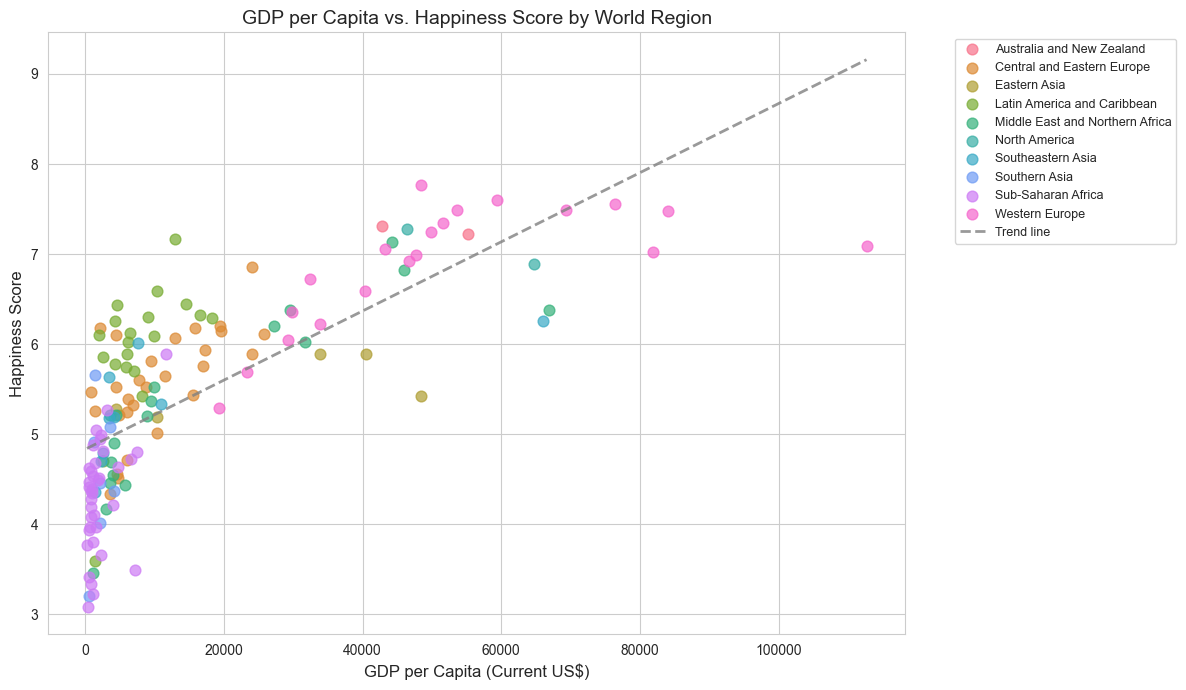

In [27]:
# Visual 1: Scatter plot of GDP per Capita vs Happiness Score by Region
# This visualization reveals whether wealthier countries tend to be happier

fig, ax = plt.subplots(figsize=(12, 7))

# Use the most recent year for a clean cross-sectional view
latest = combined[combined['Year'] == combined['Year'].max()].copy()

# Create scatter plot colored by region
regions = latest['Region'].dropna().unique()
colors = sns.color_palette('husl', len(regions))

for i, region in enumerate(sorted(regions)):
    subset = latest[latest['Region'] == region]
    ax.scatter(subset['GDP_per_Capita_USD'], subset['Happiness_Score'],
               label=region, alpha=0.7, s=60, color=colors[i])

# Add trend line across all data
valid = latest.dropna(subset=['GDP_per_Capita_USD', 'Happiness_Score'])
z = np.polyfit(valid['GDP_per_Capita_USD'], valid['Happiness_Score'], 1)
p = np.poly1d(z)
x_range = np.linspace(valid['GDP_per_Capita_USD'].min(), valid['GDP_per_Capita_USD'].max(), 100)
ax.plot(x_range, p(x_range), '--', color='gray', alpha=0.8, linewidth=2, label='Trend line')

ax.set_xlabel('GDP per Capita (Current US$)', fontsize=12)
ax.set_ylabel('Happiness Score', fontsize=12)
ax.set_title('GDP per Capita vs. Happiness Score by World Region', fontsize=14)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
plt.tight_layout()
plt.savefig('visual1_gdp_vs_happiness.png', dpi=150, bbox_inches='tight')
plt.show()

*Answer to research question:* The scatter plot reveals a clear **positive relationship** between GDP per capita and happiness scores. Countries with higher economic output per person tend to report higher happiness. However, the relationship is not purely linear—several countries in regions like Latin America and the Caribbean achieve relatively high happiness scores despite moderate GDP, suggesting that wealth alone does not determine well-being. Regional clustering is also evident, with Western European and North American countries generally occupying the upper-right quadrant (high GDP, high happiness).

/var/folders/21/zc3s332n1vj4ppg71mr1kthc0000gn/T/ipykernel_15231/2086556930.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=region_data, x='Happiness_Score', y='Region',


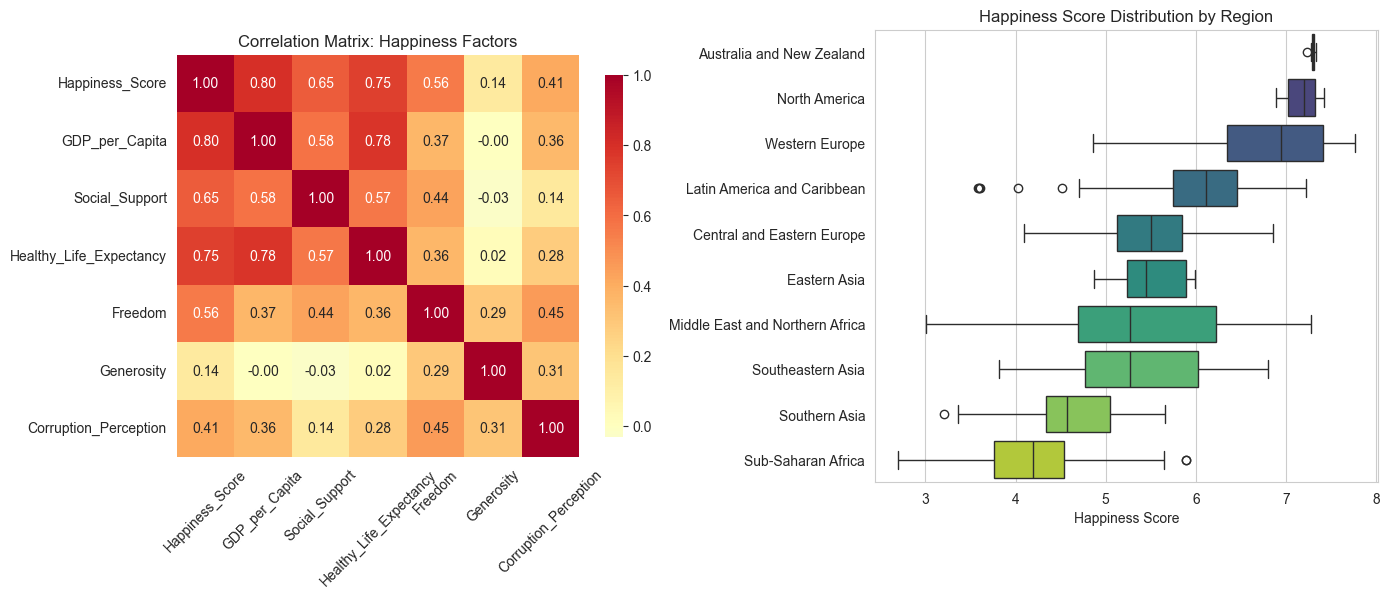

In [28]:
# Visual 2: Grouped bar chart comparing the contribution of social factors to happiness
# This shows whether social factors add explanatory power beyond GDP

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Left: Correlation heatmap of key variables
corr_cols = ['Happiness_Score', 'GDP_per_Capita', 'Social_Support', 
             'Healthy_Life_Expectancy', 'Freedom', 'Generosity', 'Corruption_Perception']
corr_data = combined[corr_cols].corr()

sns.heatmap(corr_data, annot=True, fmt='.2f', cmap='RdYlBu_r', center=0,
            square=True, ax=axes[0], cbar_kws={'shrink': 0.8})
axes[0].set_title('Correlation Matrix: Happiness Factors', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# Right: Box plot of happiness scores by region
region_order = (combined.groupby('Region')['Happiness_Score']
                .median().sort_values(ascending=False).index)
region_data = combined[combined['Region'].isin(region_order)]
sns.boxplot(data=region_data, x='Happiness_Score', y='Region',
            order=region_order, palette='viridis', ax=axes[1])
axes[1].set_title('Happiness Score Distribution by Region', fontsize=12)
axes[1].set_xlabel('Happiness Score')
axes[1].set_ylabel('')

plt.tight_layout()
plt.savefig('visual2_factors_and_regions.png', dpi=150, bbox_inches='tight')
plt.show()

*Answer to research question:* The correlation heatmap reveals that while GDP per Capita has a strong positive correlation with happiness, **Social Support** and **Healthy Life Expectancy** show similarly strong or even stronger correlations. This confirms that social factors play a significant role beyond pure economic wealth. Freedom also contributes positively, while Generosity has a weaker relationship. The box plot by region shows substantial variation in happiness scores within regions, indicating that country-level social and governance factors matter as much as regional economic conditions.

### 5.2: Reflection

*Answer:* If I had more time and resources, I would pursue several enhancements to this analysis. First, I would investigate the remaining unmatched countries more thoroughly by incorporating additional name-matching strategies or supplementing with a third dataset containing ISO country codes to improve merge coverage. Second, I would explore temporal trends more deeply—examining whether the GDP-happiness relationship has strengthened or weakened over the 2015–2019 period, and whether specific events (e.g., economic crises) affected certain regions disproportionately. Third, I would address the remaining missing Region values for countries not present in the 2015–2016 data by cross-referencing with an authoritative regional classification dataset. Finally, I would investigate potential confounding variables such as income inequality (Gini coefficient) and political stability to build a more nuanced understanding of what drives national happiness.